# Exploring Diwali Sales

# **Highlights:**

* **Customer Insights:** Understand the gender distribution and age group preferences of Diwali shoppers.
* **State-wise Analysis:** Uncover the most active regions and the highest spending states during the festive period.
* **Marital Status and Occupation Impact:** Explore the relationship between marital status, occupation, and spending habits.
* **Product Categories:** Gain insights into the most popular product categories and their impact on sales.
* **Customer Segmentation:** Utilize clustering techniques to identify distinct customer segments and their unique characteristics.
* **Customer Lifetime Value (CLV):** Estimate the long-term value of different customer segments.

**Data Preprocessing and Overview:**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the dataset
df = pd.read_csv("Diwali Sales Data.csv", encoding='unicode_escape')

# Drop unnecessary columns
df.drop(["Status", "unnamed1"], axis=1, inplace=True)

# Handling missing values
df.dropna(inplace=True)

# Change data type for 'Amount'
df['Amount'] = df['Amount'].astype('int')

# Overview of dataset
print(df.head())
print(df.info())

   User_ID  Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0  1002903  Sanskriti  P00125942      F     26-35   28               0   
1  1000732     Kartik  P00110942      F     26-35   35               1   
2  1001990      Bindu  P00118542      F     26-35   35               1   
3  1001425     Sudevi  P00237842      M      0-17   16               0   
4  1000588       Joni  P00057942      M     26-35   28               1   

            State      Zone       Occupation Product_Category  Orders  Amount  
0     Maharashtra   Western       Healthcare             Auto       1   23952  
1  Andhra Pradesh  Southern             Govt             Auto       3   23934  
2   Uttar Pradesh   Central       Automobile             Auto       3   23924  
3       Karnataka  Southern     Construction             Auto       2   23912  
4         Gujarat   Western  Food Processing             Auto       2   23877  
<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data

# **Gender analysis**

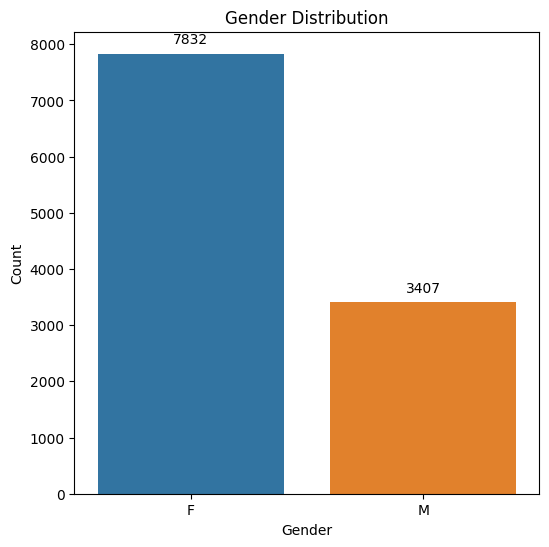

In [5]:
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(6, 6))
gender_plot = sns.countplot(x="Gender", data=df, order=gender_counts.index)
for bar in gender_plot.patches:
    gender_plot.annotate(format(bar.get_height(), '.0f'), 
                         (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                         ha='center', va='center', xytext=(0, 10), 
                         textcoords='offset points')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# **Age group analysis**

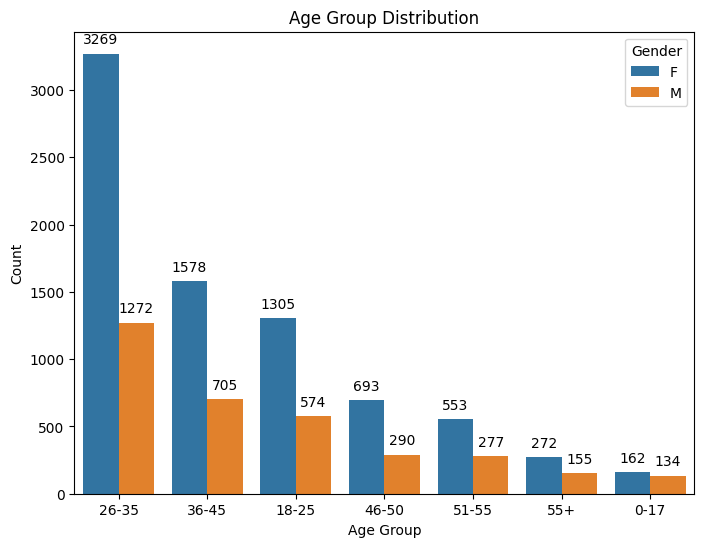

In [6]:
age_group_counts = df['Age Group'].value_counts()
plt.figure(figsize=(8, 6))
age_group_plot = sns.countplot(x="Age Group", data=df, hue="Gender", order=age_group_counts.index)
for bar in age_group_plot.patches:
    age_group_plot.annotate(format(bar.get_height(), '.0f'), 
                            (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                            ha='center', va='center', xytext=(0, 10), 
                            textcoords='offset points')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.show()

# **State-wise analysis**

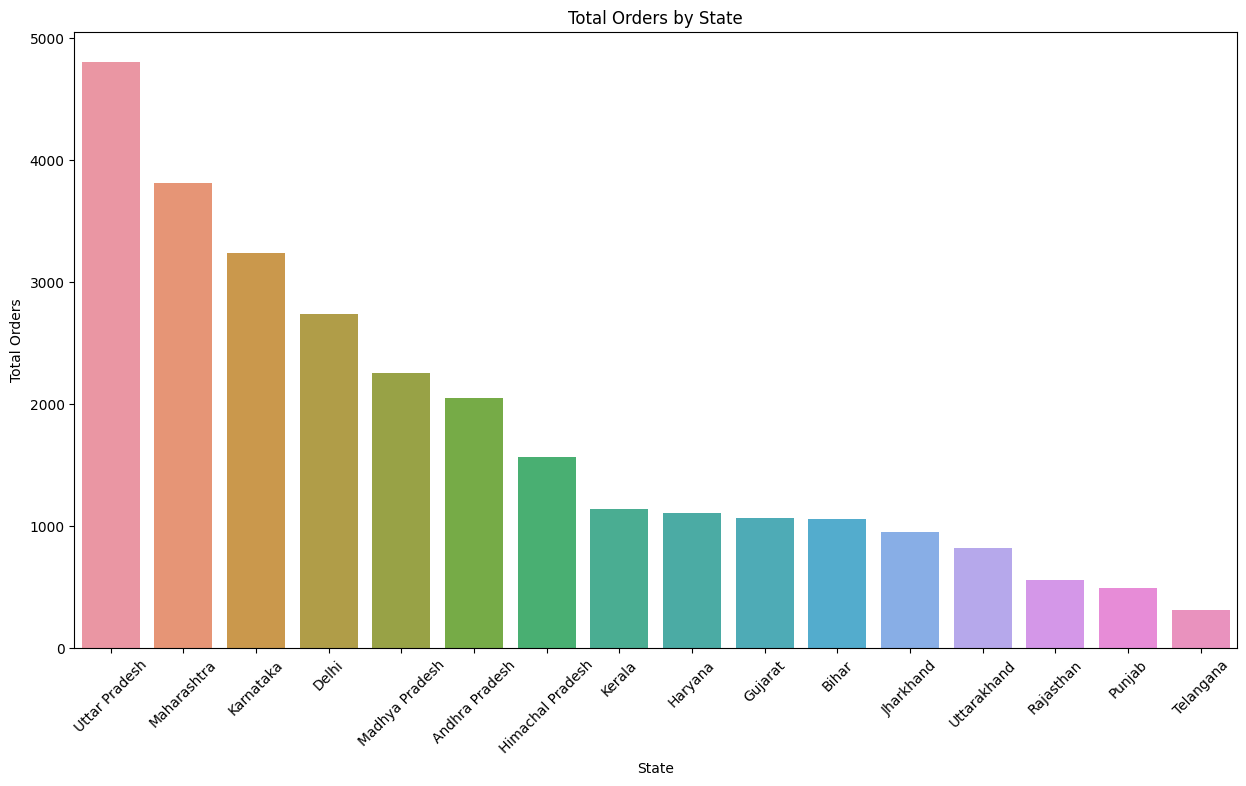

In [7]:
state_orders = df.groupby(['State'])['Orders'].sum().sort_values(ascending=False)
plt.figure(figsize=(15, 8))
sns.barplot(x=state_orders.index, y=state_orders.values)
plt.title('Total Orders by State')
plt.xlabel('State')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.show()

# **Marital status analysis**

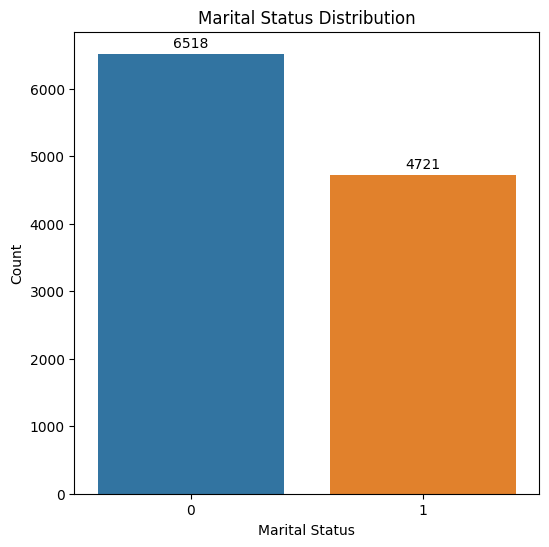

In [8]:
marital_status_counts = df['Marital_Status'].value_counts()
plt.figure(figsize=(6, 6))
sns.countplot(x="Marital_Status", data=df, order=marital_status_counts.index)
for bar in marital_status_counts.index:
    plt.text(bar, marital_status_counts[bar] + 50, str(marital_status_counts[bar]), ha='center', va='bottom')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

# **Occupation analysis**

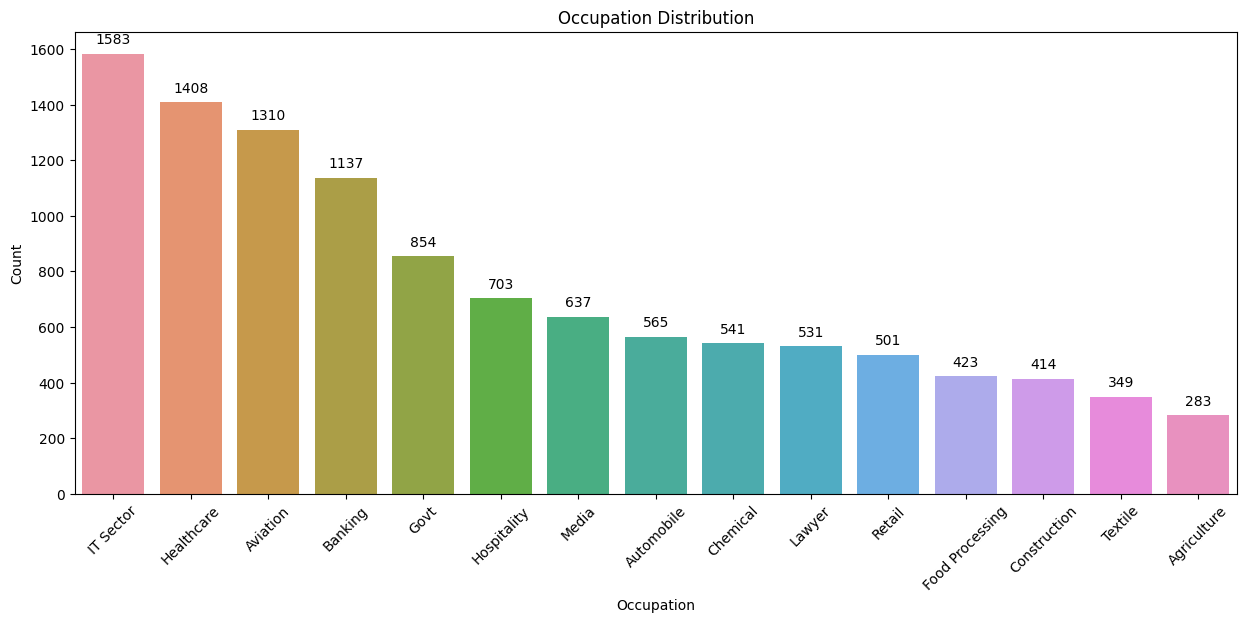

In [9]:
occupation_counts = df['Occupation'].value_counts()
plt.figure(figsize=(15, 6))
occupation_plot = sns.countplot(x="Occupation", data=df, order=occupation_counts.index)
for bar in occupation_plot.patches:
    occupation_plot.annotate(format(bar.get_height(), '.0f'), 
                            (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                            ha='center', va='center', xytext=(0, 10), 
                            textcoords='offset points')
plt.title('Occupation Distribution')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# **Product category analysis**

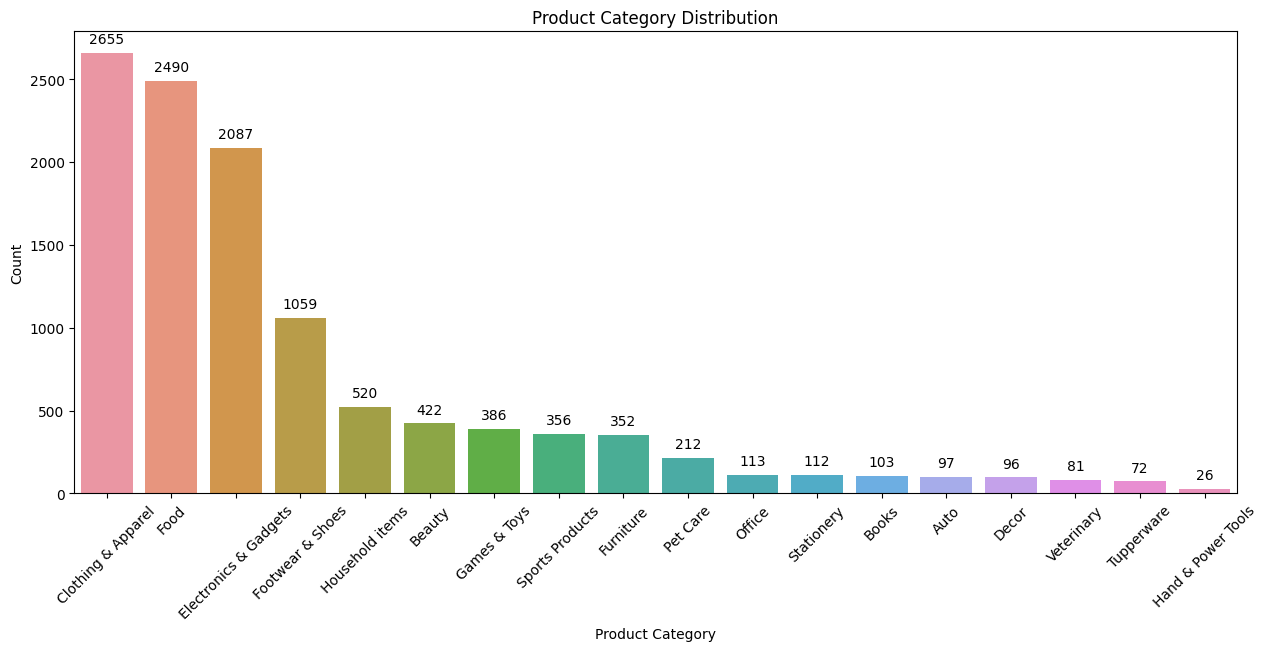

In [10]:
product_category_counts = df['Product_Category'].value_counts()
plt.figure(figsize=(15, 6))
product_category_plot = sns.countplot(x="Product_Category", data=df, order=product_category_counts.index)
for bar in product_category_plot.patches:
    product_category_plot.annotate(format(bar.get_height(), '.0f'), 
                                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                                  ha='center', va='center', xytext=(0, 10), 
                                  textcoords='offset points')
plt.title('Product Category Distribution')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# **Customer Segmentation using Clustering (K-means):**

C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


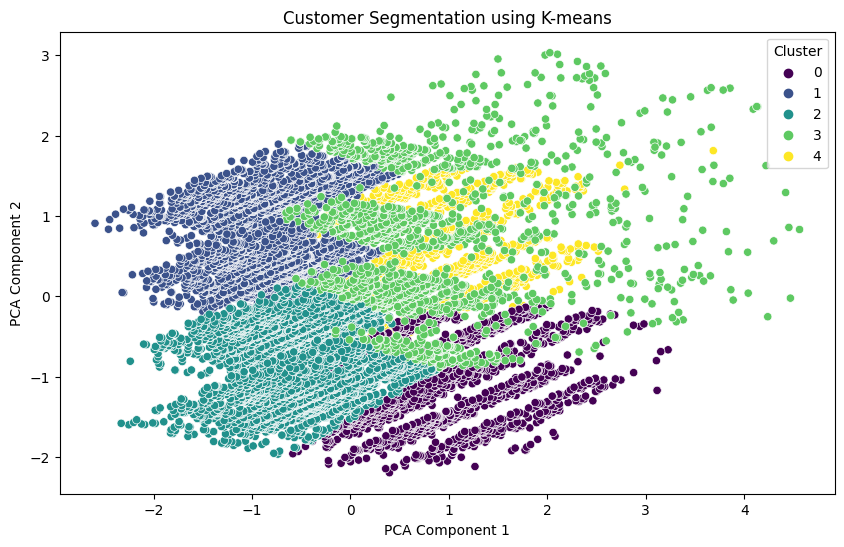

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Select relevant features
features_for_clustering = ['Age', 'Orders', 'Amount']

# Standardize the features
scaler = StandardScaler()
data_for_clustering = scaler.fit_transform(df[features_for_clustering])

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_for_clustering)

# Apply K-means clustering
num_clusters = 5  # You can adjust this
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(data_for_clustering)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=df['Cluster'], palette='viridis')
plt.title('Customer Segmentation using K-means')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

* Cluster 0: Customers with certain age, order, and spending patterns that make them distinct from other clusters.
* Cluster 1: Customers with a different set of characteristics compared to other clusters.
* Cluster 2: Another group of customers with unique patterns.
* Cluster 3: Yet another group with its own distinctive traits.
* Cluster 4: Customers who exhibit characteristics different from those in other clusters.

# **Customer Lifetime Value (CLV) Prediction:**

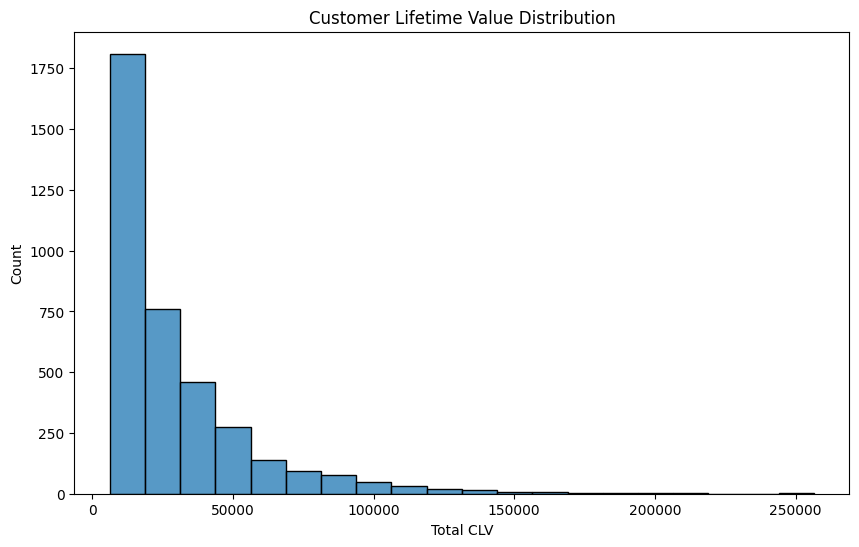

In [12]:
# Assuming you've performed customer segmentation and have 'Cluster' column
cluster_avg_amount = df.groupby('Cluster')['Amount'].mean()

# Calculate CLV for each cluster
df['CLV'] = df['Cluster'].map(cluster_avg_amount)

# Calculate total CLV for each customer
total_clv = df.groupby('User_ID')['CLV'].sum()

plt.figure(figsize=(10, 6))
sns.histplot(total_clv, bins=20)
plt.title('Customer Lifetime Value Distribution')
plt.xlabel('Total CLV')
plt.ylabel('Count')
plt.show()

# **Conclusion"**

The insights gained from this analysis include
1. Understanding gender and age group preferences can guide marketing efforts tailored to specific customer segments.
2. Knowledge of state-wise sales patterns can help businesses focus on regions with the highest potential for growth.
3. Identifying popular product categories allows businesses to optimize inventory and promotion strategies.
4. Insights from customer segmentation can inform personalized marketing campaigns and loyalty programs.
5. Time series analysis helps businesses identify peak sales periods to allocate resources effectively.